In [780]:
# PARAMETERS
n = None

In [781]:
from functools import partial

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

from sklearn import datasets
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

from sklearn.metrics import precision_score, recall_score, f1_score

In [782]:
X, y = datasets.make_classification(250000, 50,
                                    n_informative=5,
                                    flip_y=0.2,
                                    class_sep=0.3,
                                    random_state=0,
                                    scale=20,
                                    n_clusters_per_class=2)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)

In [783]:
clf = RandomForestClassifier(n_estimators=2, n_jobs=-1, max_depth=20)
clf.fit(X_train, y_train)

y_scores = clf.predict_proba(X_test)

In [784]:
thresholds = np.arange(0, 1, step=0.02)

In [802]:
def metric_at_threshold(metric, y_test, y_scores, threshold):
    return metric(y_test, y_scores >= threshold)

def flagged(y_scores, threshold):
    return (y_scores >= threshold).sum()

In [803]:
precision_score_ = partial(precision_score, zero_division=1)

In [804]:
precision = [metric_at_threshold(precision_score_, y_test, y_scores[:, 1], threshold)
             for threshold in thresholds]

recall = [metric_at_threshold(recall_score, y_test, y_scores[:, 1], threshold)
          for threshold in thresholds]

f1 = [metric_at_threshold(f1_score, y_test, y_scores[:, 1], threshold)
      for threshold in thresholds]

n_flagged = [flagged(y_scores[:, 1], threshold) for threshold in thresholds]

In [805]:
df = pd.DataFrame({'threshold': thresholds,
                   'precision': precision,
                   'recall': recall,
                   'f1': f1,
                   'n_flagged': n_flagged})

In [806]:
df.head()

,threshold,precision,recall,f1,n_flagged
0,0.00,0.501840,1.000000,0.668300,25000
1,0.02,0.504956,0.994819,0.669887,24717
2,0.04,0.509270,0.991790,0.672977,24433
3,0.06,0.514746,0.986370,0.676470,24041
4,0.08,0.523587,0.981110,0.682790,23509


In [789]:
df.to_csv('metrics.csv')

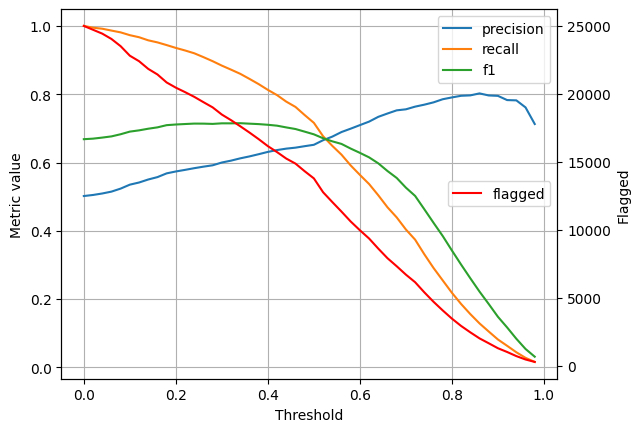

In [828]:
plt.plot(thresholds, precision, label='precision')
plt.plot(thresholds, recall, label='recall')
plt.plot(thresholds, f1, label='f1')

plt.xlabel('Threshold')
plt.legend()
plt.grid()
plt.ylabel('Metric value')

ax = plt.twinx()
plt.ylabel('Flagged')
ax.plot(thresholds, n_flagged, label='flagged', color='red')
ax.legend(loc=5)

In [791]:
idx = np.argmax(f1)

In [792]:
f1[idx]

0.715157140962737

In [793]:
precision[idx]

0.6122147803382904

In [794]:
recall[idx]

0.8597162442212657